In [ ]:
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Step 1: Upload the video file
uploaded = files.upload()

# Get the file name of the uploaded video
video_file = list(uploaded.keys())[0]
print(f"Uploaded video file: {video_file}")

# Step 2: Initialize video capture with the uploaded video
video_capture = cv2.VideoCapture(video_file)

if not video_capture.isOpened():
    print("Error: Could not open the uploaded video file.")
else:
    print("Video file accessed successfully!")

# Step 3: Loop to read and display frames from the video
while True:
    ret, frame = video_capture.read()

    # Check if the frame is read successfully
    if not ret:
        print("End of video or failed to grab frame.")
        break

    # Display the frame using cv2_imshow
    cv2_imshow(frame) # Use cv2_imshow instead of cv2.imshow

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close windows
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import torch
from google.colab.patches import cv2_imshow

# Load the pretrained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Initialize the video capture with the uploaded video file
video_capture = cv2.VideoCapture(video_file)

if not video_capture.isOpened():
    print("Error: Could not open the uploaded video file.")
else:
    print("Video file accessed successfully!")

# Limit the number of frames to process
max_frames = 100  # Adjust this number as needed
frame_count = 0

# Loop to process video frames
while frame_count < max_frames:
    ret, frame = video_capture.read()

    # Check if the frame is read successfully
    if not ret:
        print("End of video or failed to grab frame.")
        break

    # Increment frame count
    frame_count += 1

    # Convert the frame to RGB (YOLOv5 works on RGB images)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Use YOLOv5 model to detect objects
    results = model(rgb_frame)

    # Render the results on the frame
    annotated_frame = results.render()[0]

    # Display the frame with detections
    cv2_imshow(annotated_frame)  # Use cv2_imshow in Colab

# Release the video capture
video_capture.release()


In [ ]:
import cv2
import torch
import pandas as pd
from google.colab.patches import cv2_imshow

# Load the pretrained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Initialize the video capture with the uploaded video file
video_capture = cv2.VideoCapture(video_file)

if not video_capture.isOpened():
    print("Error: Could not open the uploaded video file.")
else:
    print("Video file accessed successfully!")

# Limit the number of frames to process
max_frames = 100  # Adjust this number as needed
frame_count = 0

# Data collection list
data_list = []

# Loop to process video frames
while frame_count < max_frames:
    ret, frame = video_capture.read()

    # Check if the frame is read successfully
    if not ret:
        print("End of video or failed to grab frame.")
        break

    # Increment frame count
    frame_count += 1

    # Convert the frame to RGB (YOLOv5 works on RGB images)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Use YOLOv5 model to detect objects
    results = model(rgb_frame)

    # Extract detections
    detections = results.pandas().xyxy[0]  # Convert detection results to Pandas DataFrame

    # Loop through each detected object
    for _, row in detections.iterrows():
        # Extract details
        obj_name = row['name']       # Object class name
        confidence = row['confidence']  # Confidence score
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']  # Bounding box

        # Append to data list
        data_list.append({
            "Frame": frame_count,
            "Object": obj_name,
            "Confidence": confidence,
            "X_min": xmin,
            "Y_min": ymin,
            "X_max": xmax,
            "Y_max": ymax
        })

    # Render the results on the frame
    annotated_frame = results.render()[0]

    # Display the frame with detections
    cv2_imshow(annotated_frame)  # Use cv2_imshow in Colab

# Release the video capture
video_capture.release()

# Convert the data list to a Pandas DataFrame
df = pd.DataFrame(data_list)

# Save the data to a CSV file
df.to_csv('object_detection_data.csv', index=False)
print("Data saved to object_detection_data.csv")

# Display a preview of the collected data
df.head()


Preview of the collected data:
   Frame  Object  Confidence        X_min       Y_min        X_max       Y_max
0      1  person    0.851949   204.352509  306.006744   315.105011  601.536499
1      1  person    0.845128   131.317200  322.455750   214.948669  618.278564
2      1  person    0.832602   950.255066  334.659210  1064.195068  469.044159
3      1  person    0.795228  1151.775757  303.106873  1277.174194  478.032654
4      1  person    0.751726   670.330566  341.706146   757.545288  484.200165

Object Counts:
Object
person      1219
donut         22
handbag        6
cup            4
suitcase       1
Name: count, dtype: int64

Average Confidence by Object:
Object
cup         0.350954
donut       0.279055
handbag     0.283822
person      0.633661
suitcase    0.287318
Name: Confidence, dtype: float64

Object Detection Count per Frame:
Frame
1    13
2    12
3    13
4    13
5    13
Name: Object, dtype: int64


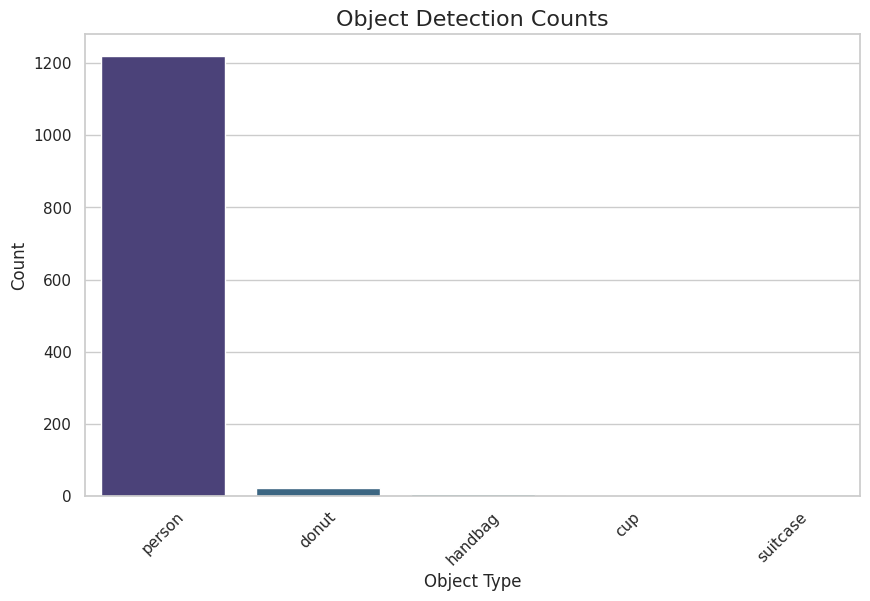

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('object_detection_data.csv')

# Preview the data
print("Preview of the collected data:")
print(df.head())

# --- Data Analytics ---

# 1. Count of each object type
object_counts = df['Object'].value_counts()
print("\nObject Counts:")
print(object_counts)

# 2. Confidence analysis
avg_confidence = df.groupby('Object')['Confidence'].mean()
print("\nAverage Confidence by Object:")
print(avg_confidence)

# 3. Frame-wise object detection count
frame_counts = df.groupby('Frame')['Object'].count()
print("\nObject Detection Count per Frame:")
print(frame_counts.head())

# --- Visualization ---

# 1. Bar plot of object counts
plt.figure(figsize=(10, 6))
sns.barplot(x=object_counts.index, y=object_counts.values, palette="viridis", hue=object_counts.index, dodge=False)
plt.legend([], [], frameon=False)  # Remove the legend for this case
plt.title("Object Detection Counts", fontsize=16)
plt.xlabel("Object Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


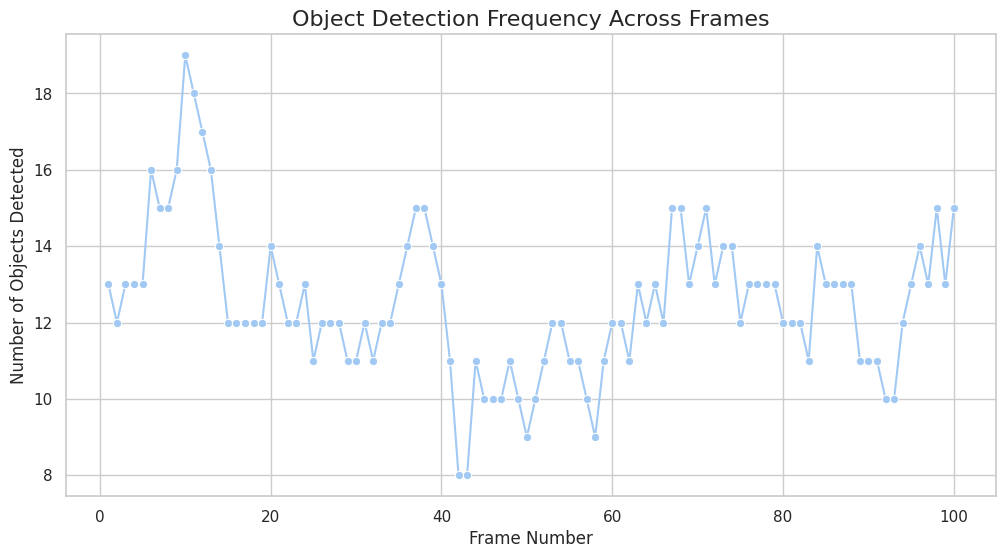

In [ ]:
# 2. Line plot of object detection frequency across frames
plt.figure(figsize=(12, 6))
sns.lineplot(x=frame_counts.index, y=frame_counts.values, marker='o', color='b')
plt.title("Object Detection Frequency Across Frames", fontsize=16)
plt.xlabel("Frame Number", fontsize=12)
plt.ylabel("Number of Objects Detected", fontsize=12)
plt.grid(True)
plt.show()


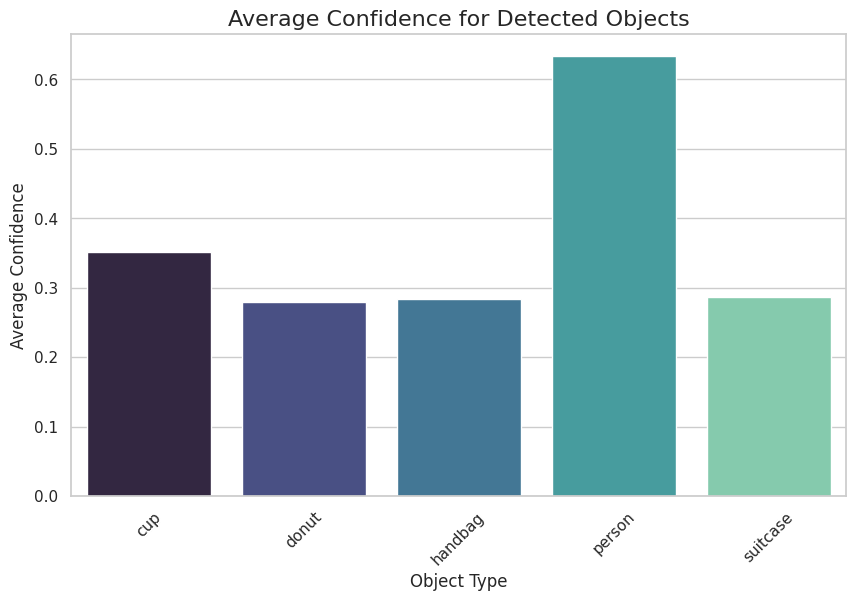

In [ ]:

# 3. Bar plot of average confidence per object
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_confidence.index, y=avg_confidence.values, palette="mako", hue=avg_confidence.index, dodge=False)
plt.legend([], [], frameon=False)  # Remove the legend for this case
plt.title("Average Confidence for Detected Objects", fontsize=16)
plt.xlabel("Object Type", fontsize=12)
plt.ylabel("Average Confidence", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Save each DataFrame to a CSV file
object_counts.to_csv('object_counts.csv', index=False)
frame_counts.to_csv('frame_counts.csv', index=False)
avg_confidence.to_csv('avg_confidence.csv', index=False)

print("Data has been saved to CSV files!")


Data has been saved to CSV files!
